In [3]:
# imports
import h2o 
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from h2o.estimators.gbm import H2OGradientBoostingEstimator 
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch

In [24]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,48 mins 15 secs
H2O cluster version:,3.10.4.8
H2O cluster version age:,2 months and 19 days
H2O cluster name:,H2O_from_python_youdan_mxiq1v
H2O cluster total nodes:,1
H2O cluster free memory:,1.246 Gb
H2O cluster total cores:,1
H2O cluster allowed cores:,1
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [6]:
df = pd.read_csv("/home/youdan/Documents/Practicum/Encoding_Version4.csv", sep=',', encoding='latin-1')
df.head()

,Unnamed: 0,odid,display_name,od_name,production_year,running_time,sequel,opening_weekend_revenue,opening_weekend_theaters,maximum_theaters,...,rating.PG,rating.PG-13,rating.R,Rank.others.y,Rank.dir_100,Rank.dir_20,Rank.dir_200,Rank.dir_500,Rank.dir_900,Rank.others
0,1,10100,Titanic,Titanic,1997,194.0,0.0,28638131,2674,3265,...,0,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2,20100,The Dark Knight,Dark Knight The,2008,152.0,1.0,158411483,4366,4366,...,0,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3,30100,Star Wars Ep. IV: A New Hope,Star Wars Ep IV A New Hope,1977,119.0,0.0,1554475,43,2375,...,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4,40100,Shrek 2,Shrek 2,2004,92.0,1.0,108037878,4163,4223,...,1,0,0,NaN,0.0,1.0,0.0,0.0,0.0,0.0
4,5,50100,ET: The Extra-Terrestrial,ET The Extra Terrestrial,1982,114.0,0.0,11911430,1101,3010,...,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [7]:
cols = list(df)
cols.insert(-1, cols.pop(cols.index('opening_weekend_revenue')))
cols
cols.insert(-1, cols.pop(cols.index('Rank.others')))
#cols

In [8]:
df = df.ix[:,cols]
df.head()

,Unnamed: 0,odid,display_name,od_name,production_year,running_time,sequel,opening_weekend_theaters,maximum_theaters,theatrical_engagements,...,rating.PG-13,rating.R,Rank.others.y,Rank.dir_100,Rank.dir_20,Rank.dir_200,Rank.dir_500,Rank.dir_900,Rank.others,opening_weekend_revenue
0,1,10100,Titanic,Titanic,1997,194.0,0.0,2674,3265,87202,...,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,28638131
1,2,20100,The Dark Knight,Dark Knight The,2008,152.0,1.0,4366,4366,39170,...,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,158411483
2,3,30100,Star Wars Ep. IV: A New Hope,Star Wars Ep IV A New Hope,1977,119.0,0.0,43,2375,43684,...,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1554475
3,4,40100,Shrek 2,Shrek 2,2004,92.0,1.0,4163,4223,33603,...,0,0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,108037878
4,5,50100,ET: The Extra-Terrestrial,ET The Extra Terrestrial,1982,114.0,0.0,1101,3010,62065,...,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11911430


In [9]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,odid,display_name,od_name,production_year,running_time,sequel,opening_weekend_theaters,maximum_theaters,theatrical_engagements,production_budget,...,rating.PG-13,rating.R,Rank.others.y,Rank.dir_100,Rank.dir_20,Rank.dir_200,Rank.dir_500,Rank.dir_900,Rank.others,opening_weekend_revenue
0,10100,Titanic,Titanic,1997,194.0,0.0,2674,3265,87202,200000000,...,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,28638131
1,20100,The Dark Knight,Dark Knight The,2008,152.0,1.0,4366,4366,39170,185000000,...,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,158411483
2,30100,Star Wars Ep. IV: A New Hope,Star Wars Ep IV A New Hope,1977,119.0,0.0,43,2375,43684,11000000,...,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1554475
3,40100,Shrek 2,Shrek 2,2004,92.0,1.0,4163,4223,33603,70000000,...,0,0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,108037878
4,50100,ET: The Extra-Terrestrial,ET The Extra Terrestrial,1982,114.0,0.0,1101,3010,62065,10500000,...,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11911430


In [10]:
df.to_csv('opening_weekend_revenue.csv')

In [11]:
path = '/home/youdan/Documents/Practicum/opening_weekend_revenue.csv'
frame = h2o.import_file(path=path) # multi-threaded import
frame.describe()

Parse progress: |█████████████████████████████████████████████████████████| 100%
Rows:10594
Cols:60




,C1,odid,display_name,od_name,production_year,running_time,sequel,opening_weekend_theaters,maximum_theaters,theatrical_engagements,production_budget,domestic_box_office,international_box_office,inflation_adjusted_domestic_box_office,name_length,source_category.fiction_tale_novel,source_category.music_dance,source_category.original_screenplay,source_category.others,source_category.play_TV_movie_film,source_category.real_factual,source_category.NA,production_companies_size.Big_15,production_companies_size.Extra_small,production_companies_size.Large,production_companies_size.Medium,production_companies_size.NULL,production_companies_size.Others,production_companies_size.Small,Rank.others.x,Rank.act_1000,Rank.act_250,Rank.act_500.x,Rank.act_750,genre.Action,genre.Adventure,genre.Comedy,genre.Concert/Performance,genre.Documentary,genre.Drama,genre.Horror,genre.Musical,genre.Others,genre.Thriller/Suspense,genre.Western,rating.G,rating.NC-17,rating.Not Rated,rating.Open,rating.PG,rating.PG-13,rating.R,Rank.others.y,Rank.dir_100,Rank.dir_20,Rank.dir_200,Rank.dir_500,Rank.dir_900,Rank.others,opening_weekend_revenue
type,int,int,string,string,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int
mins,0.0,10100.0,NaN,NaN,1902.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,25.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,5296.5,115875216.10345477,NaN,NaN,2006.8768170662638,97.1203738317756,0.04843601895734597,690.8191429110826,770.4321313951297,3971.1731168586007,13874950.005663572,18817316.41891638,23700190.34523137,25434537.117141757,15.635831602794036,0.1363979611100623,0.003209363790824995,0.46913347177647724,0.033226354540305834,0.03162167264489334,0.18302812912969604,0.14338304700774024,0.15747103868054194,0.22364029059493418,0.34223443942666404,0.36756332220695076,0.029255841350873748,0.354408010995484,0.30335754957785194,0.9393130450258053,0.29115500978821857,0.29186688022779855,0.25093432995194875,0.2407901761879338,0.06248820086841608,0.04578063054559185,0.218331130828771,0.0047196526335661695,0.13045119879176892,0.30536152539173117,0.03804040022654333,0.009533698319803663,0.1129884840475741,0.0686237492920521,0.0036813290541816124,0.016518784217481593,0.001699074948083821,0.34642250330375685,0.0002831791580139702,0.08778553898433075,0.20237870492731735,0.34491221446101566,0.6189910979228487,0.05594207014056511,0.024563396279994317,0.04671304841686781,0.09456197643049835,0.05849779923328127,0.7197217094987931,5091609.640362451
maxs,10593.0,284460100.0,NaN,NaN,2017.0,600.0,1.0,4468.0,4468.0,87202.0,425000000.0,936662225.0,2023411357.0,3926220158.0,86.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,247966675.0
sigma,3058.36871005879,73795347.49056596,NaN,NaN,7.246012430689698,35.68271325565838,0.21469592487208042,1194.5515895877886,1211.0350312240892,7296.221585490208,32428855.81257,49544119.22891575,79907153.02579232,81581240.00872976,8.748804928832836,0.3432268597563215,0.056562936387576646,0.4990699029049416,0.17923558887256325,0.17499895204443025,0.38670783401998826,0.3504795909867218,0.36428006536298047,0.41672461972231983,0.4745042006820493,0.48218894479410784,0.16853935582423948,0.47838050394022985,0.4597534658832248,0.23877645434631053,0.4543352355118052,0.4546618451710317,0.4335893793321747,0.4276012246670089,0.24205155651442375,0.2090188707748133,0.4131328588104461,0.0685406518370333,0.3368150707554786,0.4605821190148933,0.19130285585735743,0.09717869280693708,0.31659366336356903,0.2528251648517537,0.06056503212180223,0.1274654762343041,0.041186748061616936,0.4758522107022408,0.016826339253588646

In [12]:
# split into 40% training, 30% validation, and 30% test
train, valid, test = frame.split_frame([0.4, 0.3])
y = 'opening_weekend_revenue'
X = [name for name in frame.columns if name not in ['Unnamed: 0 ', 'C1','odid', 'odname', 'domestic_box_office', 'international_box_office','inflation_adjusted_domestic_box_office',y]]
print(y)
print(X)

opening_weekend_revenue
['display_name', 'od_name', 'production_year', 'running_time', 'sequel', 'opening_weekend_theaters', 'maximum_theaters', 'theatrical_engagements', 'production_budget', 'name_length', 'source_category.fiction_tale_novel', 'source_category.music_dance', 'source_category.original_screenplay', 'source_category.others', 'source_category.play_TV_movie_film', 'source_category.real_factual', 'source_category.NA', 'production_companies_size.Big_15', 'production_companies_size.Extra_small', 'production_companies_size.Large', 'production_companies_size.Medium', 'production_companies_size.NULL', 'production_companies_size.Others', 'production_companies_size.Small', 'Rank.others.x', 'Rank.act_1000', 'Rank.act_250', 'Rank.act_500.x', 'Rank.act_750', 'genre.Action', 'genre.Adventure', 'genre.Comedy', 'genre.Concert/Performance', 'genre.Documentary', 'genre.Drama', 'genre.Horror', 'genre.Musical', 'genre.Others', 'genre.Thriller/Suspense', 'genre.Western', 'rating.G', 'rating.N

In [13]:
# GBM with random hyperparameter search
# train many different GBM models with random hyperparameters
# and select best model based on validation error

# define random grid search parameters
hyper_parameters = {'ntrees':list(range(0, 500, 50)),
                    'max_depth':list(range(0, 20, 2)),
                    'sample_rate':[s/float(10) for s in range(1, 11)],
                    'col_sample_rate':[s/float(10) for s in range(1, 11)]}

# define search strategy
search_criteria = {'strategy':'RandomDiscrete',
                   'max_models':20,
                   'max_runtime_secs':600}

# initialize grid search
gsearch = H2OGridSearch(H2OGradientBoostingEstimator,
                        hyper_params=hyper_parameters,
                        search_criteria=search_criteria)

# execute training w/ grid search
gsearch.train(x=X,
              y=y,
              training_frame=train,
              validation_frame=valid)

gbm Grid Build progress: |████████████████████████████████████████████████| 100%


In [14]:
# show grid search results
gsearch.show()

# select best model
gbm_model = gsearch.get_grid()[0]

# print model information
gbm_model

     col_sample_rate max_depth ntrees sample_rate  \
0                0.5        10     50         1.0   
1                0.3        14    400         0.9   
2                0.6        18    300         1.0   
3                0.2        14     50         0.5   
4                0.4         8    350         1.0   
5                0.7        18    200         1.0   
6                0.1        10    450         0.4   
7                0.8         8    300         0.6   
8                0.3        18    250         0.3   
9                1.0        12    350         0.5   
10               1.0         8    400         0.8   
11               0.5         2    400         0.2   
12               0.4        10      0         0.5   
13               0.6        12      0         0.3   
14               0.4        18      0         0.7   
15               0.5        14      0         0.5   
16               0.7         2      0         0.7   

                                             

,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2017-08-09 14:22:33,34.717 sec,0.0,14817414.4353767,7652848.8432248,219555770549709.7812500,13265755.5667680,7425495.6981311,175980270757234.9687500
,2017-08-09 14:22:33,34.767 sec,1.0,13491382.5271933,6905890.1019706,182017402495057.2500000,12077349.7401361,6696597.4593754,145862376745565.0937500
,2017-08-09 14:22:33,34.805 sec,2.0,12307837.5161357,6225411.9459283,151482864323597.5625000,10962259.9202785,6033058.8129628,120171142559744.4218750
,2017-08-09 14:22:33,34.844 sec,3.0,11291443.2816667,5620103.8894231,127496691383095.2500000,10062746.7258872,5455341.1746926,101258871669354.1718750
,2017-08-09 14:22:33,34.888 sec,4.0,10390966.0548406,5084068.9138770,107972175552850.3593750,9243789.3713782,4952454.5979279,85447641942404.5000000
---,---,---,---,---,---,---,---,---,---
,2017-08-09 14:22:35,37.473 sec,46.0,2513562.2098467,680082.4839955,6317994982769.6474609,4611257.0232759,1433063.7087324,21263691334711.7460938
,2017-08-09 14:22:35,37.547 sec,47.0,2501276.0231656,676196.1164002,6256381744062.9423828,4607983.5615377,1429554.9119744,21233512503401.2460938
,2017-08-09 14:22:36,37.627 sec,48.0,2489115.7341425,671815.7973795,6195697137955.7705078,4616263.1811995,1429770.5925631,21309885758098.4375000
,2017-08-09 14:22:36,37.709 sec,49.0,2453437.6016001,662540.7952549,6019356064945.0126953,4613521.9226220,1428159.9817466,21284584530513.7851562



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
maximum_theaters,1876143969474183168.0000000,1.0,0.3970465
opening_weekend_theaters,1310554500951441408.0000000,0.6985362,0.2773514
theatrical_engagements,608360264684797952.0000000,0.3242610,0.1287467
production_budget,381479922943655936.0000000,0.2033319,0.0807322
running_time,175727470224343040.0000000,0.0936642,0.0371890
---,---,---,---
source_category.music_dance,0.0,0.0,0.0
genre.Musical,0.0,0.0,0.0
genre.Western,0.0,0.0,0.0
rating.NC-17,0.0,0.0,0.0



See the whole table with table.as_data_frame()


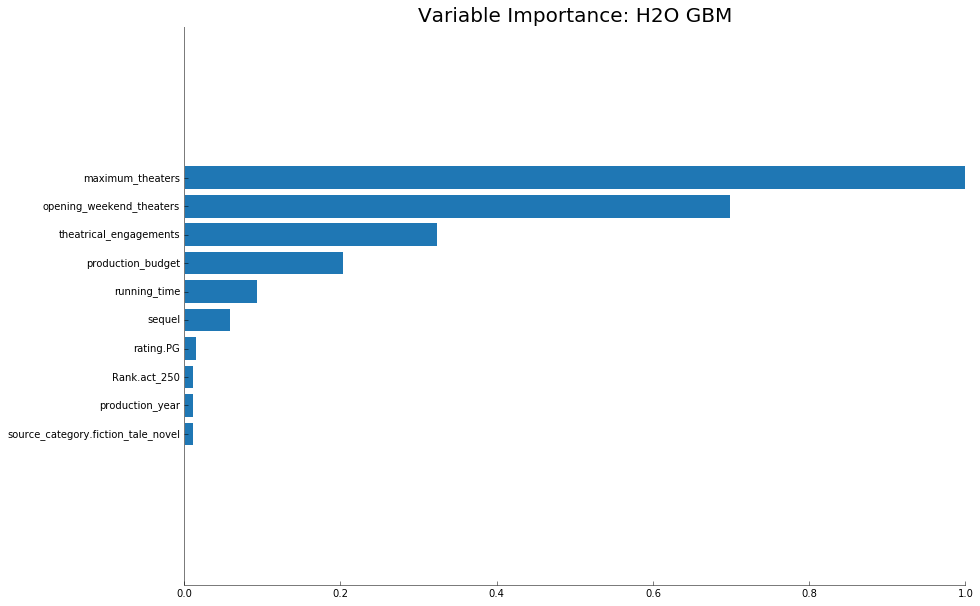

In [15]:
gbm_model.varimp_plot(num_of_features=10)

In [16]:
predictions = gbm_model.predict(test[:-1])

gbm prediction progress: |████████████████████████████████████████████████| 100%


In [17]:
print(gbm_model.model_performance(test_data=test).r2())
print(gbm_model.model_performance(test_data=test).mse())

0.868468311278245
28714260592034.383


In [18]:
test=test.cbind(predictions)
#test_df=test.as_data_frame()
#result = test_df.sort_values(['predict'],ascending=False)
#result1 = result.reset_index(drop= True)

In [19]:
result1.head()

,C1,odid,display_name,od_name,production_year,running_time,sequel,opening_weekend_theaters,maximum_theaters,theatrical_engagements,...,rating.R,Rank.others.y,Rank.dir_100,Rank.dir_20,Rank.dir_200,Rank.dir_500,Rank.dir_900,Rank.others,opening_weekend_revenue,predict
0,7989,179490100,Avengers: Age of Ultron,Avengers Age of Ultron,2015,141.0,1.0,4276,4276,30109,...,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,191271109,1.620864e+08
1,8610,196380100,Batman v Superman: Dawn of Justice,Batman v Superman Dawn of Justice,2015,151.0,1.0,4242,4256,25005,...,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,166007347,1.602144e+08
2,6032,117960100,The Avengers,Avengers The (2011),2012,143.0,0.0,4349,4349,37645,...,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,207438708,1.498353e+08
3,30,310100,Harry Potter and the Half-Blood Prince,Harry Potter and the Half Blood Prince,2009,153.0,1.0,4325,4455,27206,...,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,77835727,1.471712e+08
4,1,20100,The Dark Knight,Dark Knight The,2008,152.0,1.0,4366,4366,39170,...,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,158411483,1.467438e+08


In [20]:
newdf = result1[result1.columns[59:61]]
newdf.head()

,opening_weekend_revenue,predict
0,191271109,1.620864e+08
1,166007347,1.602144e+08
2,207438708,1.498353e+08
3,77835727,1.471712e+08
4,158411483,1.467438e+08


In [21]:
%matplotlib inline

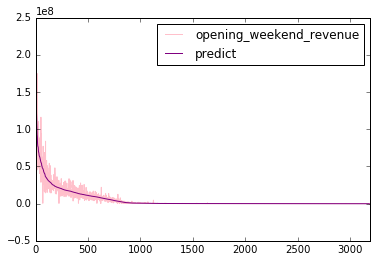

In [22]:
newdf.plot(color=['pink','purple'])

In [26]:
h2o.cluster().shutdown(prompt=True)

Are you sure you want to shutdown the H2O instance running at http://localhost:54321 (Y/N)? yes
H2O session _sid_abdb closed.
